In [74]:
import pickle
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt

from keras.models import Sequential,Model
from keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D

%matplotlib inline

In [13]:
df_train = pd.DataFrame(pd.read_pickle("train/train.pickle"))
df_test = pd.DataFrame(pd.read_pickle("test/test.pickle"))

In [7]:
df_train.head()

,features,label
0,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
1,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
2,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
3,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."
4,"[1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ..."


In [8]:
def features_to_matrix(dataset):
    pixs = dataset['features'].apply(pd.Series)
    pixs = pixs.rename(columns = lambda x: 'pix_' + str(x))
    return pixs

In [14]:
x_train = features_to_matrix(df_train[:70000])
x_test = features_to_matrix(df_test)
x_train = pd.concat([x_train, features_to_matrix(df_train[70000:])], axis=0)
x_train.shape

(80432, 784)

In [40]:
y_test = df_test['label']
y_test = y_test.apply(pd.Series)
y_test = y_test.rename(columns = lambda x: 'class_' + str(x))

In [26]:
y_train = df_train['label']
y_train = y_train.apply(pd.Series)
y_train = y_train.rename(columns = lambda x: 'class_' + str(x))

In [15]:
x_reshaped = x_train.values.reshape((x_train.shape[0], 28, 28, 1))
x_test_reshaped = x_test.values.reshape(x_test.shape[0], 28, 28, 1)

In [29]:
hidden_size = 64
classes_num = y_train.shape[1]
classes_num

101

In [75]:
model = Sequential()
model.add(Conv2D(10, kernel_size=5, activation='relu', input_shape=(28,28,1)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(20, kernel_size=5, activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten())
model.add(Dense(hidden_size, activation='relu'))
model.add(Dense(classes_num, activation='softmax'))

In [76]:
optimazer = keras.optimizers.Adam(lr=0.005, beta_1=0.9, beta_2=0.999, amsgrad=False)

In [77]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [78]:
history = model.fit(x_reshaped, y_train, batch_size=128, validation_split=0.33, epochs=6)

Train on 53889 samples, validate on 26543 samples
Epoch 1/6
53889/53889 [==============================] - 10s 192us/step - loss: 1.7070 - accuracy: 0.5983 - val_loss: 1.0591 - val_accuracy: 0.7171
Epoch 2/6
53889/53889 [==============================] - 10s 192us/step - loss: 0.8035 - accuracy: 0.7822 - val_loss: 0.8006 - val_accuracy: 0.7878
Epoch 3/6
53889/53889 [==============================] - 10s 192us/step - loss: 0.6537 - accuracy: 0.8165 - val_loss: 0.7070 - val_accuracy: 0.8091
Epoch 4/6
53889/53889 [==============================] - 10s 192us/step - loss: 0.5759 - accuracy: 0.8365 - val_loss: 0.6273 - val_accuracy: 0.8290
Epoch 5/6
53889/53889 [==============================] - 10s 192us/step - loss: 0.5257 - accuracy: 0.8487 - val_loss: 0.6326 - val_accuracy: 0.8219
Epoch 6/6
53889/53889 [==============================] - 10s 193us/step - loss: 0.4924 - accuracy: 0.8572 - val_loss: 0.6129 - val_accuracy: 0.8346


In [79]:
history.history.keys()

dict_keys(['val_loss', 'val_accuracy', 'loss', 'accuracy'])

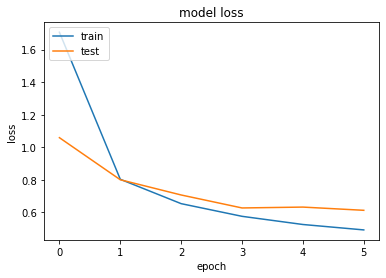

In [80]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

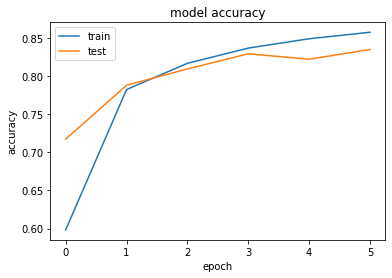

In [81]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [82]:
score, acc = model.evaluate(x_test_reshaped, y_test, batch_size=500)
score, acc

5555/5555 [==============================] - 0s 62us/step


(0.7695397329051467, 0.7803780436515808)